In [1]:
# 초기 설정
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="internal gelsd")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHARTER_ID = "end_to_end_project"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHARTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

# 그림을 저장하는 method
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution = 300):
    path = os.path.join(IMAGE_PATH, fig_id + "."+ fig_extension)
    print("그림 저장", path, fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Neural Network

### Activation Function

#### Step Function(계단 함수)
- 0 또는 1을 출력함

In [2]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [3]:
x = np.array([-0.1, 1.0, 2.0])
y = x>0
print("x = ", x)
print("y = ", y)

x =  [-0.1  1.   2. ]
y =  [False  True  True]


In [4]:
y = y.astype(np.int)
print("y = ", y)

y =  [0 1 1]


In [5]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

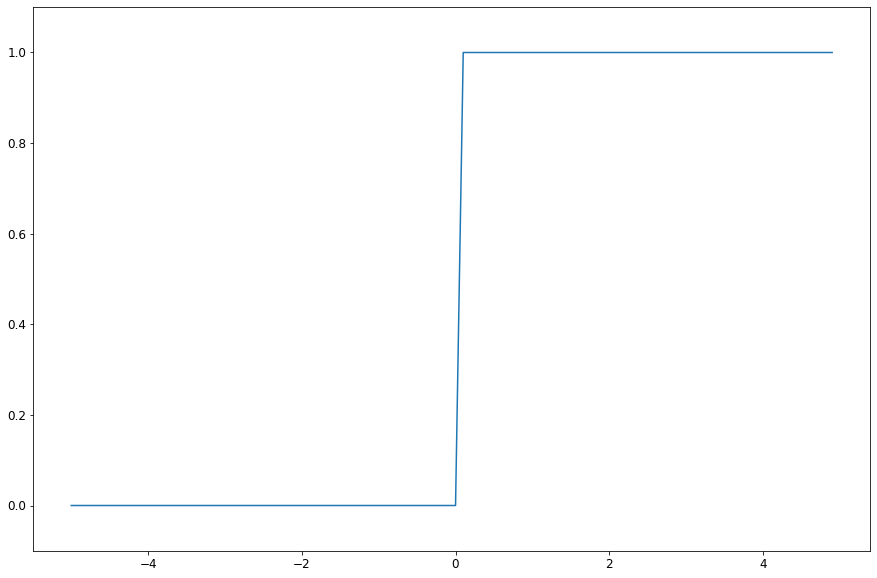

In [6]:
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.figure(figsize=(15,10))
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

#### Sigmoid Function

In [8]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [9]:
x = np.array([-1, 1.0, 2.0])
y = sigmoid(x)
print("y = ", y)

y =  [0.26894142 0.73105858 0.88079708]


In [10]:
t = np.array([1.0, 2.0, 3.0])
print("t + 1 =", t + 1)
print("1 / t = ", 1/ t)

t + 1 = [2. 3. 4.]
1 / t =  [1.         0.5        0.33333333]


In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

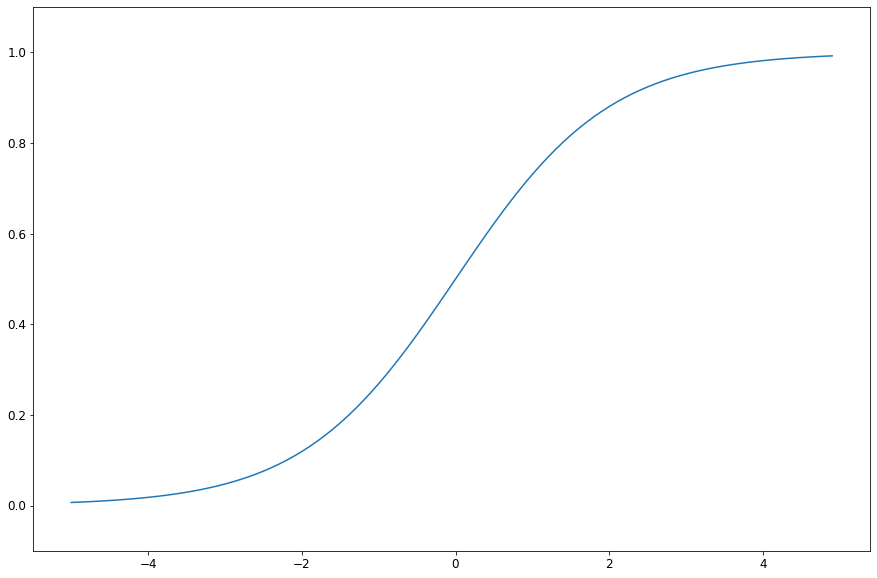

In [14]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.figure(figsize=(15,10))
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

#### ReLU(Rectified Linear Unit)

In [16]:
def relu(x):
    return np.maximum(0, x)

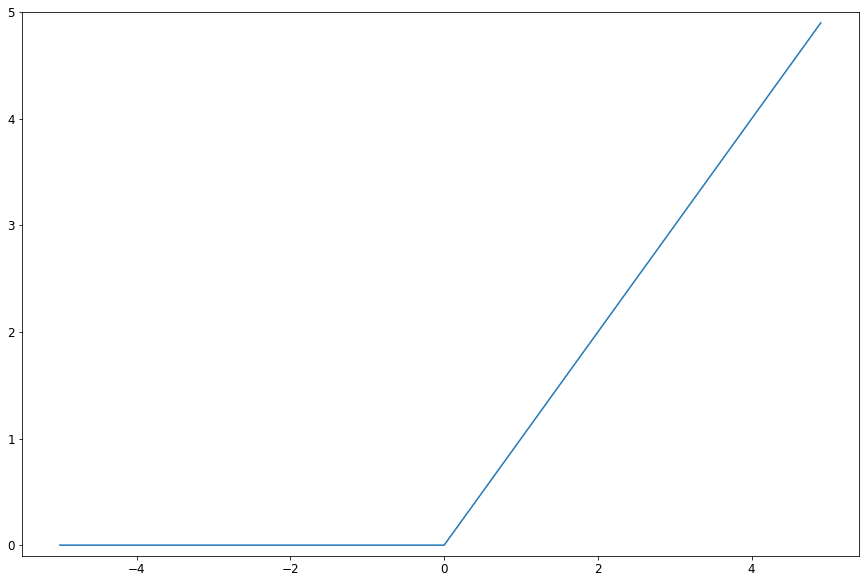

In [17]:
X = np.arange(-5.0, 5.0, 0.1)
Y = relu(X)
plt.figure(figsize=(15,10))
plt.plot(X, Y)
plt.ylim(-0.1, 5)
plt.show()

### Array

##### 행렬의 내적(행렬 곱)

In [20]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
result = np.dot(A, B)

In [21]:
print("AㆍB = ", result)
print("result.shape =", result.shape)

AㆍB =  [[19 22]
 [43 50]]
result.shape = (2, 2)


## 신경망

### 신경망 구현하기

#### 각 층별 신호 전달 구현 Code

In [26]:
x = np.array([1.0, 0.5])
weight1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
bias1 = np.array([0.1, 0.2, 0.3])

print("shape of input : ", x.shape)
print("shape of weight1 : ", weight1.shape)
print("shape of bias1 : ", bias1.shape)

shape of input :  (2,)
shape of weight1 :  (2, 3)
shape of bias1 :  (3,)


#### 활성화 함수 처리 Code : Layer1

In [30]:
result_of_inner1 = np.dot(x, weight1) + bias1
result_of_sigmoid1 = sigmoid(result_of_inner1)

print("result_of_inner1 = ", result_of_inner1)
print("result_of_sigmoid1 = ", result_of_sigmoid1)

result_of_inner1 =  [0.3 0.7 1.1]
result_of_sigmoid1 =  [0.57444252 0.66818777 0.75026011]


#### 활성화 함수 처리 Code : Layer1

In [31]:
weight2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
bias2 = np.array([0.1, 0.2])

print("shape of sigmoid1 : ", result_of_sigmoid1.shape)
print("shape of weight2 : ", weight2.shape)
print("shape of bias2 : ", bias2.shape)

shape of sigmoid1 :  (3,)
shape of weight2 :  (3, 2)
shape of bias2 :  (2,)


In [32]:
result_of_inner2 = np.dot(result_of_sigmoid1, weight2) + bias2
result_of_sigmoid2 = sigmoid(result_of_inner2)

print("result_of_inner2 = ", result_of_inner2)
print("result_of_sigmoid2 = ", result_of_sigmoid2)

result_of_inner1 =  [0.51615984 1.21402696]
result_of_sigmoid1 =  [0.62624937 0.7710107 ]


In [34]:
weight3 = np.array([[0.1, 0.3], [0.2, 0.4]])
bias3 = np.array([0.1, 0.2])

print("shape of sigmoid2 : ", result_of_sigmoid2.shape)
print("shape of weight3 : ", weight3.shape)
print("shape of bias3 : ", bias3.shape)

shape of sigmoid2 :  (2,)
shape of weight3 :  (2, 2)
shape of bias3 :  (2,)


In [35]:
result_of_inner3 = np.dot(result_of_sigmoid2, weight3) + bias3
result_of_sigmoid3 = sigmoid(result_of_inner3)

print("result_of_inner3 = ", result_of_inner3)
print("result_of_sigmoid3 = ", result_of_sigmoid3)

result_of_inner3 =  [0.31682708 0.69627909]
result_of_sigmoid3 =  [0.57855079 0.66736228]


#### 구현정리
- init_network() : weight와 bias를 초기화 한 후 network에 저장
- forward() : 입력을 출력으로 변환하는 처리과정

In [41]:
def identity_function(x):
    return x

In [42]:
def init_network():
    network = {}
    network["weight1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["bias1"] = np.array([0.1, 0.2, 0.3])
    network["weight2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["bias2"] = np.array([0.1, 0.2])
    network["weight3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["bias3"] = np.array([0.1, 0.2])
    return network

In [45]:
def forward(network, x):
    weight1, weight2, weight3 =  network["weight1"], network["weight2"], network["weight3"]
    bias1, bias2, bias3 = network["bias1"], network["bias2"], network["bias3"]
    
    result_of_inner1 = np.dot(x, weight1) + bias1
    output1 = sigmoid(result_of_inner1)
    result_of_inner2 = np.dot(output1, weight2) + bias2
    output2 = sigmoid(result_of_inner2)
    result_of_inner3 = np.dot(output2, weight3) + bias3
    y = identity_function(result_of_inner3)
    
    return y

In [46]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층 구현하기

### 항등함수(identity Function) 와 소프트 맥스 함수(softmax Function)

#### SofmtMax Function
- Stack OverFlow Problem : softmax function is using exponential function which spends lots of memory
- Computer is dealing with number by limited data such as 4byte, 8byte etc...
- If number is getting larger and larger, computer can't express it caused by overflow problems

In [51]:
# It can be errored by overflow
def softmax(matrix):
    exponential_matrix = np.exp(matrix)
    sum_of_exponential_matrix = np.sum(exponential_matrix)
    y = exponential_matrix / sum_of_exponential_matrix

In [53]:
matrix = np.array([1010, 1000, 900])
result_of_softmax = np.exp(matrix) / np.sum(np.exp(matrix))
print(result_of_softmax)

[nan nan nan]


C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [57]:
maximum_of_matrix = np.max(matrix)
difference_from_maximun = matrix - maximum_of_matrix
print(difference_from_maximun)

[   0  -10 -110]


In [59]:
result_of_softmax = np.exp(difference_from_maximun) / np.sum(np.exp(difference_from_maximun))
print(result_of_softmax)

[9.99954602e-01 4.53978687e-05 1.68883521e-48]


In [60]:
def softmax(matix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximun = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximun)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    
    return y

In [62]:
matrix = np.array([0.3, 2.9, 4.0])
y = softmax(matrix)
print("y = ", y)
print("sum of y = ", np.sum(y))

y =  [0.01821127 0.24519181 0.73659691]
sum of y =  1.0
